# Linear Regression

Import everything that we need for this project.

In [4]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

## Load housing price dataset

In [5]:
from sklearn.datasets import load_boston  # housing dataset
boston = load_boston()
print(boston.keys())###useful to find how you can access the returned object
print(boston.DESCR)  #print(boston['DESCR'])

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])
.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX

### Let's have a peek at our dataset

In [6]:
col_names=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
X= pd.DataFrame(boston.data, columns=col_names)
print(X)

Y = pd.DataFrame(boston.target, columns=['median_price'])
#print(Y)

#check for missing values
X.isnull().sum()



         CRIM    ZN  INDUS  CHAS    NOX     RM    AGE     DIS   RAD    TAX  \
0     0.00632  18.0   2.31   0.0  0.538  6.575   65.2  4.0900   1.0  296.0   
1     0.02731   0.0   7.07   0.0  0.469  6.421   78.9  4.9671   2.0  242.0   
2     0.02729   0.0   7.07   0.0  0.469  7.185   61.1  4.9671   2.0  242.0   
3     0.03237   0.0   2.18   0.0  0.458  6.998   45.8  6.0622   3.0  222.0   
4     0.06905   0.0   2.18   0.0  0.458  7.147   54.2  6.0622   3.0  222.0   
5     0.02985   0.0   2.18   0.0  0.458  6.430   58.7  6.0622   3.0  222.0   
6     0.08829  12.5   7.87   0.0  0.524  6.012   66.6  5.5605   5.0  311.0   
7     0.14455  12.5   7.87   0.0  0.524  6.172   96.1  5.9505   5.0  311.0   
8     0.21124  12.5   7.87   0.0  0.524  5.631  100.0  6.0821   5.0  311.0   
9     0.17004  12.5   7.87   0.0  0.524  6.004   85.9  6.5921   5.0  311.0   
10    0.22489  12.5   7.87   0.0  0.524  6.377   94.3  6.3467   5.0  311.0   
11    0.11747  12.5   7.87   0.0  0.524  6.009   82.9  6.2267   

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

### No missing values. Time to normalize your dataset

In [7]:
from sklearn import preprocessing

#do minmax normalization
x = X.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()#other kinds of normalization possible
x_scaled = min_max_scaler.fit_transform(x)
X_scaled = pd.DataFrame(x_scaled, columns=col_names)

final_dataset = pd.concat([X_scaled, Y], axis=1, sort=False)
final_dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,median_price
0,0.000000,0.18,0.067815,0.0,0.314815,0.577505,0.641607,0.269203,0.000000,0.208015,0.287234,1.000000,0.089680,24.0
1,0.000236,0.00,0.242302,0.0,0.172840,0.547998,0.782698,0.348962,0.043478,0.104962,0.553191,1.000000,0.204470,21.6
2,0.000236,0.00,0.242302,0.0,0.172840,0.694386,0.599382,0.348962,0.043478,0.104962,0.553191,0.989737,0.063466,34.7
3,0.000293,0.00,0.063050,0.0,0.150206,0.658555,0.441813,0.448545,0.086957,0.066794,0.648936,0.994276,0.033389,33.4
4,0.000705,0.00,0.063050,0.0,0.150206,0.687105,0.528321,0.448545,0.086957,0.066794,0.648936,1.000000,0.099338,36.2


# Training our First Linear Regression Model (with only one feature)

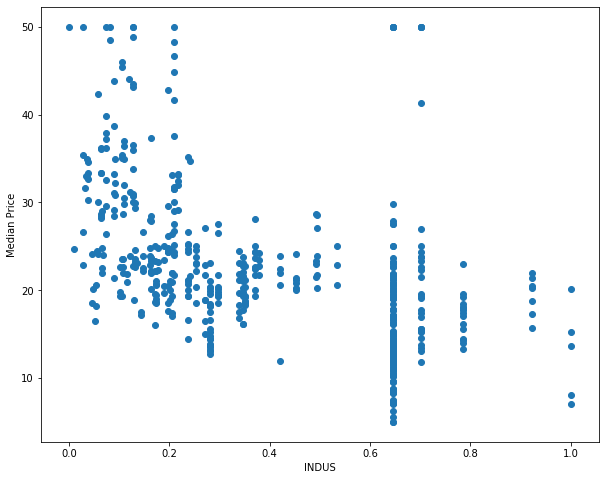

In [9]:
import matplotlib.pyplot as plt

X_1 = final_dataset['INDUS']
Y_1=final_dataset['median_price']

plt.figure(figsize=(10,8))
plt.scatter(X_1, Y_1)
plt.ylabel('Median Price')
plt.xlabel('INDUS')
plt.show()

In [10]:
from sklearn.linear_model import LinearRegression

##choose model hyperparams
model = LinearRegression(fit_intercept=True)
print(model)

model.fit(X_1.to_numpy().reshape(-1, 1),Y_1)

print("Learnt model is ==> MED_PRICE = "+str(model.coef_)+"*INDUS + "+str(model.intercept_))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
Learnt model is ==> MED_PRICE = [-17.69080866]*INDUS + 29.45659108726526


In [21]:
Y_predicted = model.predict(X_1.to_numpy().reshape(-1,1))

plt.plot(X_1, Y_predicted, color='black', linewidth=2)
plt.scatter(X_1, Y_1, color='blue')
plt.legend(['Predicted line', 'Observed data'])
plt.ylabel('Median Price')
plt.xlabel('INDUS')
plt.show()




ValueError: shapes (506,1) and (13,) not aligned: 1 (dim 1) != 13 (dim 0)

# Let's try adding non-linear features.
Recall from class that if we add non-linear features (such as square or cube of the current features) to the feature set, and then train linear regression on this augmented set of features, we will end up learning a polynomial regressor.

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


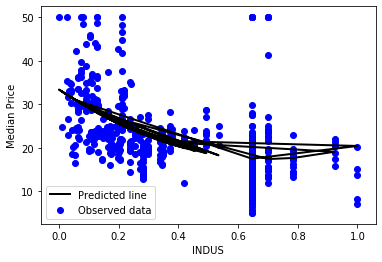

In [12]:
X_squared = X_1.pow(2)
X_augmented = pd.concat([X_1, X_squared], axis=1, sort=False)

from sklearn.linear_model import LinearRegression

##choose model hyperparams
model = LinearRegression(fit_intercept=True)
print(model)

model.fit(X_augmented.to_numpy(),Y_1)



####plot the new learnt model
x_plot_value = X_1
x_plot_value.drop_duplicates()

y_plot_value = model.coef_[0]*x_plot_value + model.coef_[1]*x_plot_value*x_plot_value + model.intercept_

plt.plot(x_plot_value, y_plot_value, color='black', linewidth=2)
plt.scatter(X_1, Y_1, color='blue')
plt.legend(['Predicted line', 'Observed data'])
plt.ylabel('Median Price')
plt.xlabel('INDUS')
plt.show()

## Adding One More Feature

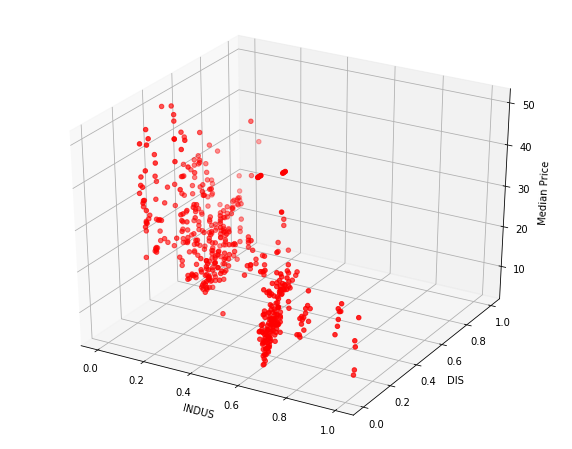

In [13]:
from mpl_toolkits.mplot3d import Axes3D

X_1 = final_dataset['INDUS']
X_2 = final_dataset['DIS']
Y_1=final_dataset['median_price']


fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_1, X_2, Y_1, c='r', marker='o')
ax.set_xlabel('INDUS')
ax.set_ylabel('DIS')
ax.set_zlabel('Median Price')

plt.show()

In [14]:
from sklearn.linear_model import LinearRegression

##choose model hyperparams
model = LinearRegression(fit_intercept=True)
print(model)

X_twofeat = pd.concat([X_1, X_2], axis=1, sort=False)

model.fit(X_twofeat.to_numpy() , Y_1)
print("Learnt model is ==> MED_PRICE = "+str(model.coef_[0])+"*INDUS + "+str(model.coef_[1])+"*DIS + "+str(model.intercept_))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
Learnt model is ==> MED_PRICE = -22.49690936892097*INDUS + -8.91490742062438*DIS + 33.49839751015257


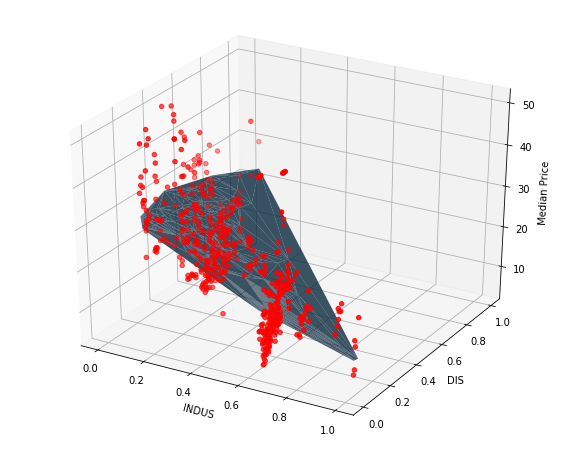

In [15]:
Y_predicted = model.predict(X_twofeat.to_numpy())

from mpl_toolkits import mplot3d

fig = plt.figure(figsize=(10,8))
ax = plt.axes(projection='3d')

ax.scatter(X_1, X_2, Y_1, c='r', marker='o')
ax.plot_trisurf(X_1, X_2, Y_predicted, alpha=0.8)
#ax.plot_surface(X_1, X_2, Y_predicted, alpha=0.2)
ax.set_xlabel('INDUS')
ax.set_ylabel('DIS')
ax.set_zlabel('Median Price')

plt.show()

# Adding All The Features. Linear Regression

In [16]:
X = final_dataset.loc[:,final_dataset.columns!='median_price']
Y = final_dataset['median_price']

print(type(X))
print(type(Y))

from sklearn.linear_model import LinearRegression

##choose model hyperparams
model = LinearRegression()
print(model)

model.fit(X,Y)

print("Learnt model is ==> Coefficients: "+str(model.coef_)+" Intercept: "+str(model.intercept_))

Y_predicted = model.predict(X)

final_dataset['Predictions'] = Y_predicted

final_dataset.head(15)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
Learnt model is ==> Coefficients: [ -9.60975755   4.64204584   0.56083933   2.68673382  -8.63457306
  19.88368651   0.06721501 -16.22666104   7.03913802  -6.46332721
  -8.95582398   3.69282735 -19.01724361] Intercept: 26.620267584687756


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,median_price,Predictions
0,0.000000,0.180,0.067815,0.0,0.314815,0.577505,0.641607,0.269203,0.000000,0.208015,0.287234,1.000000,0.089680,24.0,30.003843
1,0.000236,0.000,0.242302,0.0,0.172840,0.547998,0.782698,0.348962,0.043478,0.104962,0.553191,1.000000,0.204470,21.6,25.025562
2,0.000236,0.000,0.242302,0.0,0.172840,0.694386,0.599382,0.348962,0.043478,0.104962,0.553191,0.989737,0.063466,34.7,30.567597
3,0.000293,0.000,0.063050,0.0,0.150206,0.658555,0.441813,0.448545,0.086957,0.066794,0.648936,0.994276,0.033389,33.4,28.607036
4,0.000705,0.000,0.063050,0.0,0.150206,0.687105,0.528321,0.448545,0.086957,0.066794,0.648936,1.000000,0.099338,36.2,27.943524
5,0.000264,0.000,0.063050,0.0,0.150206,0.549722,0.574665,0.448545,0.086957,0.066794,0.648936,0.992990,0.096026,28.7,25.256284
6,0.000921,0.125,0.271628,0.0,0.286008,0.469630,0.656025,0.402923,0.173913,0.236641,0.276596,0.996722,0.295254,22.9,23.001808
7,0.001554,0.125,0.271628,0.0,0.286008,0.500287,0.959835,0.438387,0.173913,0.236641,0.276596,1.000000,0.480684,27.1,19.535988
8,0.002303,0.125,0.271628,0.0,0.286008,0.396628,1.000000,0.450354,0.173913,0.236641,0.276596,0.974104,0.778146,16.5,11.523637
9,0.001840,0.125,0.271628,0.0,0.286008,0.468097,0.854789,0.496731,0.173913,0.236641,0.276596,0.974305,0.424117,18.9,18.920262


### How good is this classifier doing?

In [22]:
LossFunc_Vec = final_dataset['median_price'] - final_dataset['Predictions']
SquaredLossVector = LossFunc_Vec.pow(2)
LossFunctionValue = np.sum(SquaredLossVector)
print("MODEL LEARNT BY LINEAR REGRESSION: ")
print("Learnt model is ==> Coefficients: "+str(model.coef_)+" Intercept: "+str(model.intercept_))
print("Loss function value achieved: "+str(LossFunctionValue))


MODEL LEARNT BY LINEAR REGRESSION: 
Learnt model is ==> Coefficients: [ -9.60975755   4.64204584   0.56083933   2.68673382  -8.63457306
  19.88368651   0.06721501 -16.22666104   7.03913802  -6.46332721
  -8.95582398   3.69282735 -19.01724361] Intercept: 26.620267584687756
Loss function value achieved: 11078.784577954977


## The Impact of Regularization
As you can see, not even a single coefficient is close to zero (except for 0.06 and 0.56, which means that our LR model depends significantly on 11 features, which is a complicated model. Complicated models are prone to overfitting on the training dataset.

To prevent overfitting, we in many case, explicitly desire to learn a simpler model. This simpler model may not perform as well on the training dataset, but atleast it will be simple to understand, and it will be able to predict future instances much better (if the overfitting problem goes away).

As discussed in class, two ways to modify (i.e., regularize) Linear Regression to simplify the learnt model: Ridge regression and Lasso. 

Let's start with Ridge Regression.

In [23]:
from sklearn.linear_model import Ridge

#set tradeoff factor to 1.0
model = Ridge(alpha=1.0)
print(model)

model.fit(X,Y)

Y_predicted = model.predict(X)

final_dataset['Predictions'] = Y_predicted

final_dataset.head(15)

LossFunc_Vec = final_dataset['median_price'] - final_dataset['Predictions']
SquaredLossVector = LossFunc_Vec.pow(2)
LossFunctionValue = np.sum(SquaredLossVector)
print("MODEL LEARNT BY RIDGE REGRESSION: ")
print("Learnt model is ==> Coefficients: "+str(model.coef_)+" Intercept: "+str(model.intercept_))
print("Loss function value achieved: "+str(LossFunctionValue))

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)
MODEL LEARNT BY RIDGE REGRESSION: 
Learnt model is ==> Coefficients: [ -6.92132185   3.81439703  -0.27123764   2.88858776  -7.00114223
  18.67224057   0.05225147 -13.37059426   5.62472746  -5.310455
  -8.75179293   3.71825282 -18.48235099] Intercept: 26.024590562711854
Loss function value achieved: 11197.639830162852


## Try with alpha = 0
We will end up getting exactly the same model as we got in Linear Regression.

In [24]:
from sklearn.linear_model import Ridge

#set tradeoff factor to 0.0
model = Ridge(alpha=0.0)
print(model)

model.fit(X,Y)

Y_predicted = model.predict(X)

final_dataset['Predictions'] = Y_predicted

final_dataset.head(15)

LossFunc_Vec = final_dataset['median_price'] - final_dataset['Predictions']
SquaredLossVector = LossFunc_Vec.pow(2)
LossFunctionValue = np.sum(SquaredLossVector)
print("MODEL LEARNT BY RIDGE REGRESSION: ")
print("Learnt model is ==> Coefficients: "+str(model.coef_)+" Intercept: "+str(model.intercept_))
print("Loss function value achieved: "+str(LossFunctionValue))

Ridge(alpha=0.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)
MODEL LEARNT BY RIDGE REGRESSION: 
Learnt model is ==> Coefficients: [ -9.60975755   4.64204584   0.56083933   2.68673382  -8.63457306
  19.88368651   0.06721501 -16.22666104   7.03913802  -6.46332721
  -8.95582398   3.69282735 -19.01724361] Intercept: 26.620267584687763
Loss function value achieved: 11078.784577954975


## Try increasing alpha to see effect. alpha=10

In [25]:
from sklearn.linear_model import Ridge

#set tradeoff factor to 0.0
model = Ridge(alpha=10.0)
print(model)

model.fit(X,Y)

Y_predicted = model.predict(X)

final_dataset['Predictions'] = Y_predicted

final_dataset.head(15)

LossFunc_Vec = final_dataset['median_price'] - final_dataset['Predictions']
SquaredLossVector = LossFunc_Vec.pow(2)
LossFunctionValue = np.sum(SquaredLossVector)
print("MODEL LEARNT BY RIDGE REGRESSION: ")
print("Learnt model is ==> Coefficients: "+str(model.coef_)+" Intercept: "+str(model.intercept_))
print("Loss function value achieved: "+str(LossFunctionValue))

Ridge(alpha=10.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)
MODEL LEARNT BY RIDGE REGRESSION: 
Learnt model is ==> Coefficients: [ -2.49039731   2.30718031  -2.3081712    3.2512366   -3.06814302
  12.01024094  -0.64918315  -5.41145763   1.84934251  -3.02842891
  -7.31220947   3.23697498 -13.25480021] Intercept: 25.836982472520056
Loss function value achieved: 14021.135999219705


## Try increasing alpha to see effect. alpha=100

In [26]:
from sklearn.linear_model import Ridge

#set tradeoff factor to 0.0
model = Ridge(alpha=100.0)
print(model)

model.fit(X,Y)

Y_predicted = model.predict(X)

final_dataset['Predictions'] = Y_predicted

final_dataset.head(15)

LossFunc_Vec = final_dataset['median_price'] - final_dataset['Predictions']
SquaredLossVector = LossFunc_Vec.pow(2)
LossFunctionValue = np.sum(SquaredLossVector)
print("MODEL LEARNT BY RIDGE REGRESSION: ")
print("Learnt model is ==> Coefficients: "+str(model.coef_)+" Intercept: "+str(model.intercept_))
print("Loss function value achieved: "+str(LossFunctionValue))

Ridge(alpha=100.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)
MODEL LEARNT BY RIDGE REGRESSION: 
Learnt model is ==> Coefficients: [-0.72552563  1.42806292 -1.91937013  1.46622136 -1.44430072  2.99863126
 -1.39308002 -0.10850762 -1.29502112 -2.08017943 -2.84274435  1.46315705
 -3.86645113] Intercept: 25.93877124606395
Loss function value achieved: 25712.89605579189


# Now let's try Lasso. 

In [27]:
from sklearn.linear_model import Lasso

#set tradeoff factor to 0.0
model = Lasso(alpha=1.0)
print(model)

model.fit(X,Y)

Y_predicted = model.predict(X)

final_dataset['Predictions'] = Y_predicted

final_dataset.head(15)

LossFunc_Vec = final_dataset['median_price'] - final_dataset['Predictions']
SquaredLossVector = LossFunc_Vec.pow(2)
LossFunctionValue = np.sum(SquaredLossVector)
print("MODEL LEARNT BY RIDGE REGRESSION: ")
print("Learnt model is ==> Coefficients: "+str(model.coef_)+" Intercept: "+str(model.intercept_))
print("Loss function value achieved: "+str(LossFunctionValue))

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)
MODEL LEARNT BY RIDGE REGRESSION: 
Learnt model is ==> Coefficients: [-0.          0.         -0.          0.         -0.          0.
 -0.          0.         -0.         -1.18994528 -0.          0.
 -7.56782651] Intercept: 25.316222356861836
Loss function value achieved: 32342.882210659394


### Almost all intercepts down to 0 in the model trained above.

Maybe the alpha parameter value was too high. Let's try reducing it to see if it makes the model more reasonable.

In [28]:
from sklearn.linear_model import Lasso

#set tradeoff factor to 0.2
model = Lasso(alpha=0.2)
print(model)

model.fit(X,Y)

Y_predicted = model.predict(X)

final_dataset['Predictions'] = Y_predicted

final_dataset.head(15)

LossFunc_Vec = final_dataset['median_price'] - final_dataset['Predictions']
SquaredLossVector = LossFunc_Vec.pow(2)
LossFunctionValue = np.sum(SquaredLossVector)
print("MODEL LEARNT BY RIDGE REGRESSION: ")
print("Learnt model is ==> Coefficients: "+str(model.coef_)+" Intercept: "+str(model.intercept_))
print("Loss function value achieved: "+str(LossFunctionValue))

Lasso(alpha=0.2, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)
MODEL LEARNT BY RIDGE REGRESSION: 
Learnt model is ==> Coefficients: [ -0.           0.          -0.           0.95446398  -0.
  14.17496412  -0.          -0.          -0.          -0.89049086
  -6.55312047   0.66150054 -19.31936081] Intercept: 24.75604033491536
Loss function value achieved: 14588.047405772944
